# Fetal Health Classification Data Analysis

## Overview

As medical technology advances, the rate of preventable child mortality decreases. Lowering child mortality rates has become a key goal in advancing any society and a key in human progress as a whole. While there are many advancements that have improved the mortality rate, not all of these practices are globally available. In order to improve mortality rates in cost effective and readily available solutions need to be applied and perfected.

One such cost effective and relatively simple method would be the use of Cardiotocograms (CTG). The CTG is a non-invasive fetal monitor which is used to asses fetal health. The CTG is used to detect fetal heart rate (FHR), uterine contractions, fetal movement, and sudden changes in heart rate. Extreme changes to the FHR results in surgical intervention through the use of cesarian delivery(C-section). Currently, doctors rely on a visual analysis of the CTG leading to erroneous interpretations of the exam. Minute changes which may be extremely detrimental to fetal health may also not be visible to the naked eye. Conversely some observable changes in fetal heart rate may appear to be fetal distress but are just a response to other factors like uterine contractions. Opting to perform a C-section increases the chances of mortality not only for the child but also the mother. For these reasons’ visual analysis of a CTG exam is limited by human error and cannot definitively detect fetal distress.


In order to improve diagnosis of fetal distress with a CTG and improve the mortality rate, the use of machine learning algorithms becomes a viable option. A well-trained model will be able to identify which variable changes to the FHR have the greatest effect on fetal health. To lower the overall risk of child mortality a ML model must not only be able to accurately classify between normal and distressed fetal health but be precise enough in its predictions to prevent any unnecessary interventive surgical procedures.


For our analysis of the we used a CTG exam dataset found on Kaggle from The Journal of Maternal-Fetal Medicine. The dataset consisted of 2126 CTG exam records which were classified into three classes (normal, suspect, pathological). In this initial analysis we decided to create a binary class of normal and distressed, combining the suspect and pathological classes into one class.


To address the issue of eliminating human error and erroneous surgical intervention, our goal of this analysis was to identify which key features played a role in determining the healthy or distressed classes, and to produce a highly precise model to eliminate unnecessary C-sections. To achieve these goals, we performed an extensive exploratory data analysis, created baseline models and preformed hyperparameter tuning of models for both an experimental feature and unaltered CTG data set. Our final model had clear feature importance and the best evaluation metrics.




## Bussiness Problem 
Preventing child mortality is a key indicator of medical progress.  A large percentage of deaths are the result of low access to resources that monitor fetal health.  One cost effective solution to monitor fetal health is the use of Cardiotocograms(CTGs). CTGs monitor fetal heart rate, fetal movement, uterine contractions, sudden heart rate changes and many other health metrics.  CTG scans are currently interpreted via visual analysis by the physician, and erroneous errors may result in increase fetal health risk.  Using a kaggle database of collected CTG exams, we aim to identify which features have the most impact on fetal health being either normal or distressed.  Using these features, we also aim to tune a model that provides the best predictions of fetal health class.  To identify the key features and create a precise model we considered the following **research questions: 
- What feature have the greatest influence on the model
- What, if any, new features affect the model
- Which model makes the best predictions of fetal health class, and has the most precise predictions.

## Read In Data

- Data of CTG exam fetal health classification was downloaded from Kaggle and read in with pandas.  The dataframe was checked for dataframe shape, data types and missing values.

In [6]:
# Import Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', 300)
% matplotlib inline

plt.style.use('seaborn')

In [7]:
#Check filepath for fetel health csv
import os
os.path.isfile('../Phase_3_Project/data.csv/fetal_health.csv')

False

In [9]:
#Read in fetal health Csv
df = pd.read_csv('data.csv/fetal_health.csv')


In [10]:
#Check columns and rows
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   
1                                 10.4            130.0           68.0   
2                                 13.4            130.0           68.0   
3                                 23.0            117.0           53.0   
4                                 19.9            117.0           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0

## Data Cleaning

- The Dataframe had no missing values, 22 columns and 2126 rows and all the datatypes where float integers.

In [11]:
#Check for null Values
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [12]:
#Check Shape of dataframe
df.shape

(2126, 22)

In [13]:
#Data types
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

The dataframe had no missing values, and was 22 columns with 2126 rows.  The data type for each column was a float. 

In [14]:
#change any value of the target value above one to two, creating two target classes instead of three classes. 
df.fetal_health = np.where(df.fetal_health > 1.0, 2.0, df.fetal_health)

In [15]:
df.fetal_health.value_counts()

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

We decided to create a binary targert where the fetal health was either normal (1) or in distress (2).

## EDA

In this stage of our analysis we wanted to take an indepth look at the data.  We examined the target classes and the relationships of the features with both the target class and themselves.  

In [16]:
# value counts for having heart disease or not
df['fetal_health'].value_counts()

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


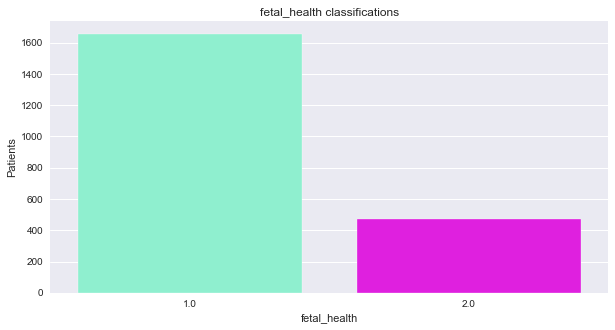

In [17]:
# Check the Distribution of target data
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['fetal_health'], alpha = 1, palette= ['aquamarine','magenta','mediumblue'])
plt.title('fetal_health classifications')
plt.ylabel('Patients')

plt.show()

- Here we created a visualization showing the distribution of samples that where classified as either healthy (1) or distressed (2).  There is a significant difference in the two sample sizes.  We will need to consider class imbalance in our modeling hyperpareters.  

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/envs/

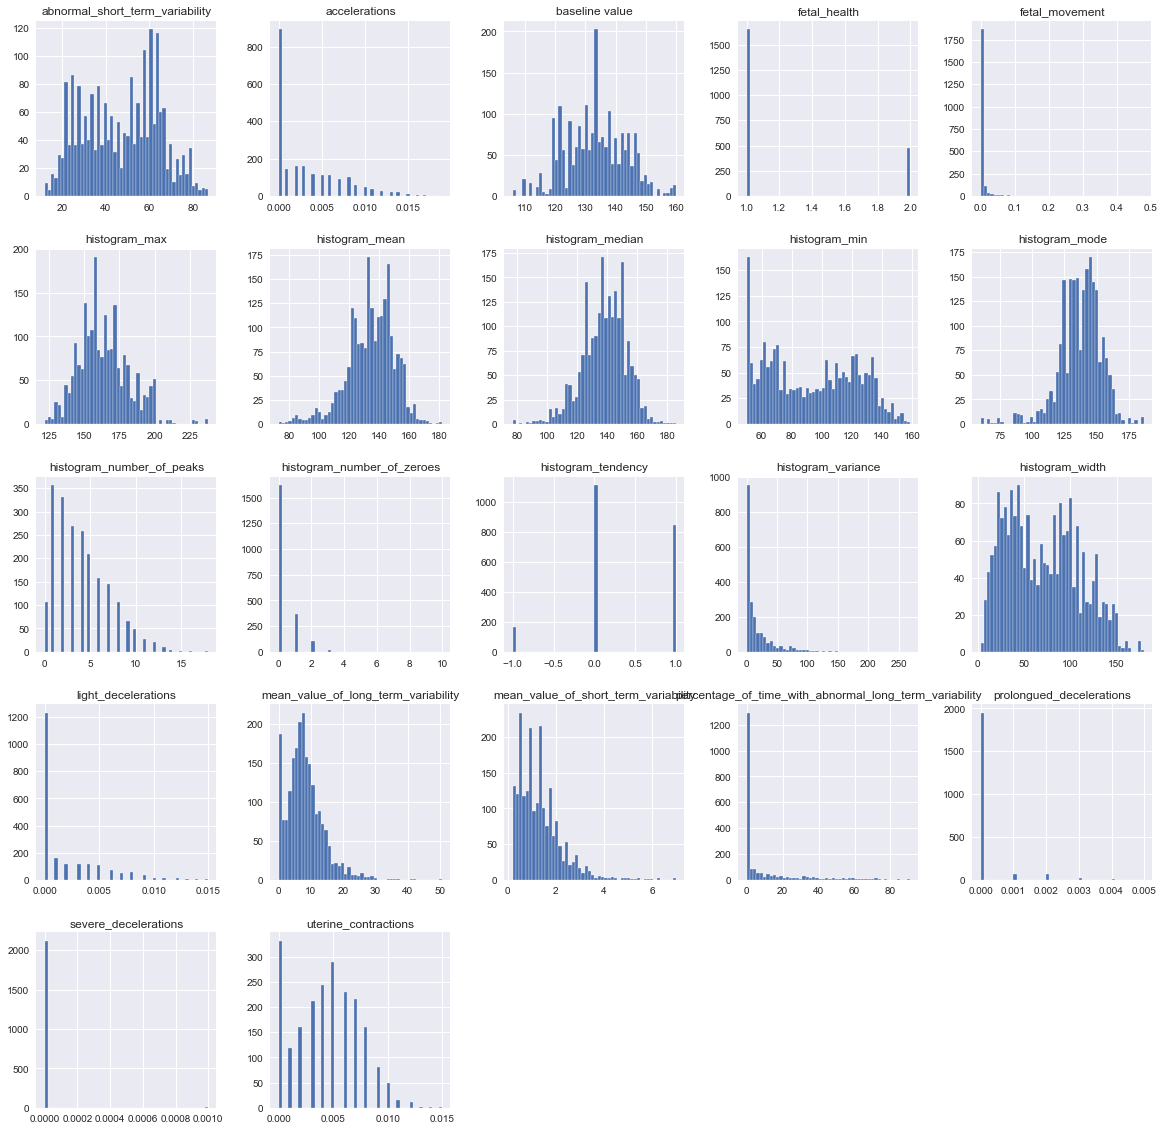

In [18]:
# Histogram of all featrues
df.hist(bins=50, figsize=(20,20))
plt.show()

- We created a histogram of each feature to visualize the distribution of of each feature.  Certain features such as acceleration, light decelerations and fetal movement seem ideal for binning, while catagorical features like prolonged deceleration, severe deceleration and histogram tendancy seemed ideal for dummy catagories.  

In [19]:
#Check the statistical data of the features
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  \
count                                         2126.00000        
mean                                             9.84666        
std                                             18.39688        
min                                              0.00000        
25%                                              0.00000        
50%                                              0.00000        
75%                                             11.00000        
max                                             91.00000        

       mean_value_of_long_term_variability  histogram_width  histogram_min  \
count                          2126.000000      2126.000000    2126.000000   
mean                              8.187629        70.445908      93.579492   
std                               5.628247        38.955693      29.560212   
min                               0.000000         3.000000      50.000000   
25%                               4.600000        37.000000      67.000000   
50%                               7.400000        67.500000      93.000000   
75%                              10.800000       100.000000     120.000000   
max                              50.700000       180.000000     159.000000   

       histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
count    2126.000000                2126.000000                 2126.000000   
mean      164.025400                   4.068203                    0.323612   
std        17.944183                   2.949386                    0.706059   
min       122.000000                   0.000000                    0.000000   
25%       152.000000                   2.000000                    0.000000   
50%       162.000000                   3.000000                    0.000000   
75%       174.000000                  

In [20]:
#check feature corrolation 
df.corr()

baseline value  \
baseline value                                            1.000000   
accelerations                                            -0.080560   
fetal_movement                                           -0.033436   
uterine_contractions                                     -0.146373   
light_decelerations                                      -0.159032   
severe_decelerations                                     -0.053518   
prolongued_decelerations                                 -0.104597   
abnormal_short_term_variability                           0.305570   
mean_value_of_short_term_variability                     -0.279607   
percentage_of_time_with_abnormal_long_term_vari...        0.285630   
mean_value_of_long_term_variability                      -0.032091   
histogram_width                                          -0.147679   
histogram_min                                             0.361619   
histogram_max                                             0.275110   
histogram_number_of_peaks                                -0.113933   
histogram_number_of_zeroes                               -0.004745   
histogram_mode                                            0.708993   
histogram_mean                                            0.723121   
histogram_median                                          0.789246   
histogram_variance                                       -0.133938   
histogram_tendency                                        0.293503   
fetal_health                                              0.251875   

                                                    accelerations  \
baseline value                                          -0.080560   
accelerations                                            1.000000   
fetal_movement                                           0.048235   
uterine_contractions                                     0.089674   
light_decelerations                                     -0.108615   
severe_decelerations                                    -0.043018   
prolongued_decelerations                                -0.127749   
abnormal_short_term_variability                         -0.279577   
mean_value_of_short_term_variability                     0.207170   
percentage_of_time_with_abnormal_long_term_vari...      -0.373943   
mean_value_of_long_term_variability                     -0.142363   
histogram_width                                          0.298631   
histogram_min                                           -0.154286   
histogram_max                                            0.394147   
histogram_number_of_peaks                                0.190452   
histogram_number_of_zeroes                              -0.006147   
histogram_mode                                           0.243610   
histogram_mean                                           0.270334   
histogram_median                                         0.272849   
histogram_variance                                       0.125704   
histogram_tendency                                       0.028420   
fetal_health                                            -0.394760   

                                                    fetal_movement  \
baseline value                                           -0.033436   
accelerations                                             0.048235   
fetal_movement                                            1.000000   
uterine_contractions                                     -0.068779   
light_decelerations                                       0.049228   
severe_decelerations                                     -0.010976   
prolongued_decelerations                                  0.265922   
abnormal_short_term_variability                          -0.103715   
mean_value_of_short_term_variability                      0.121314   
percentage_of_time_with_abnormal_long_term_vari...       -0.074096   
mean_value_of_long_term_variability                       0.011047   
histogram_wid

In [21]:
#create dataframe of predictor variables
fetal_health_pred = df.drop('fetal_health', axis =1)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/envs/

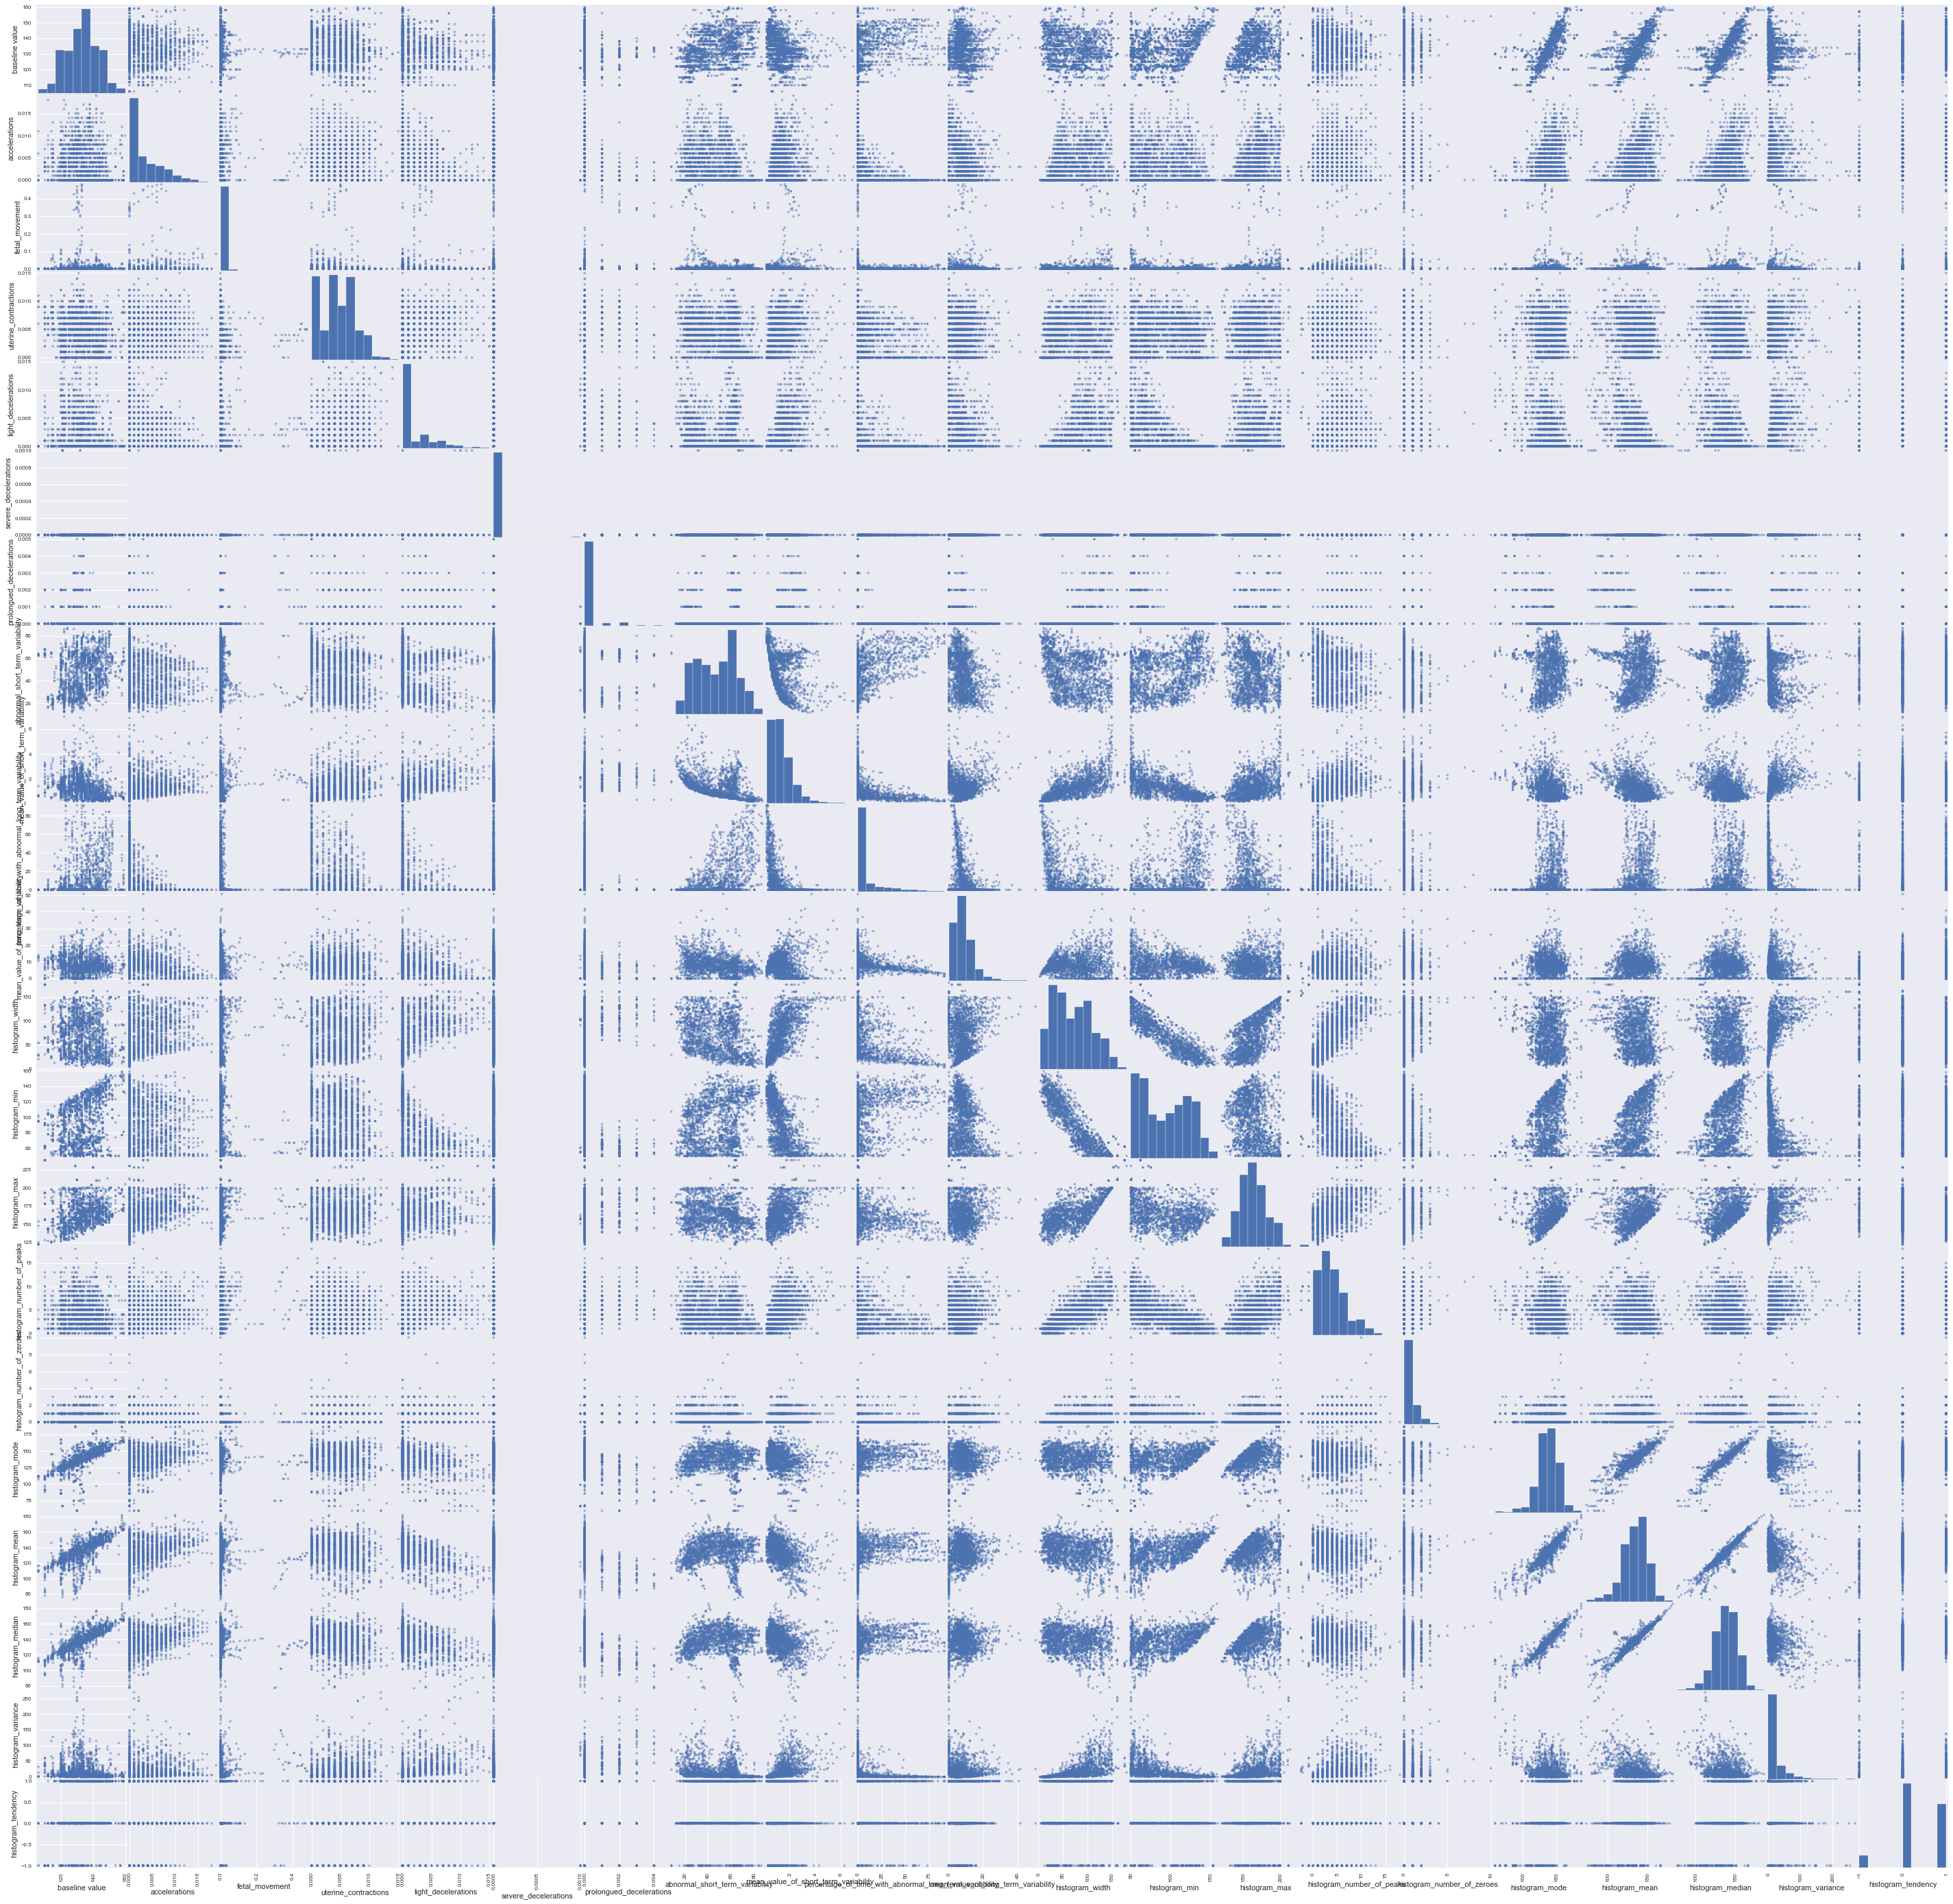

In [22]:
#plot a scatter matrix of predictor variable relationships
pd.plotting.scatter_matrix(fetal_health_pred,figsize= (50,50));
plt.show()

- In this section of the EDA we checked individual features and their interactions with the target and other features.  We were looking any irregularities, outliers and distributions, that we could use to create new features for better classification.  

In [23]:
#check value counts of uterine_contractions
df.uterine_contractions.value_counts()

0.000    332
0.005    290
0.004    244
0.006    231
0.007    216
0.003    212
0.008    160
0.002    160
0.001    118
0.009     82
0.010     49
0.011     16
0.012     11
0.013      2
0.014      2
0.015      1
Name: uterine_contractions, dtype: int64

In [24]:
#Check value counts of abnormal short term varitability
df.abnormal_short_term_variability.value_counts()

60.0    62
58.0    61
65.0    60
64.0    58
63.0    58
        ..
83.0     4
14.0     4
12.0     2
82.0     2
87.0     1
Name: abnormal_short_term_variability, Length: 75, dtype: int64

- We wanted to take a closer look at the histogram features.  These features where values taken from the histogogram of the baseline fetal heart rate and the frequency of changes over time.  These distribution of FHR changers over time are the same metrics that physicians use for their visual analysis of the CTG.  Our initial thought was that these histogram values would be the key variables in determining fetal health class. 

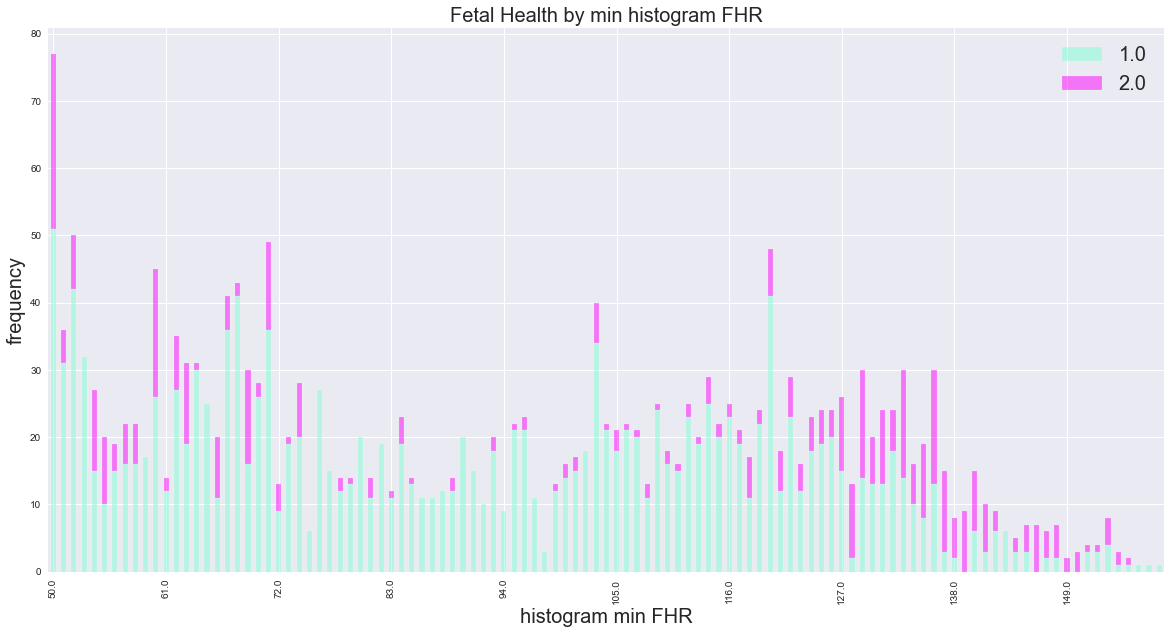

In [30]:
#Histogram showing the histogram distrubition values of minimum FHR by the Classes
histogram_min = df.groupby(['histogram_min','fetal_health']).histogram_min.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram min FHR',fontsize=20)
pl.locator_params(axis='x',nbins=10)
pl.legend(fontsize=20)
pl.set_ylabel('frequency',fontsize=20)
pl.set_title('Fetal Health by min histogram FHR',fontsize=20)
plt.savefig('images/Fetal_Health_by_min_histogram_FHR.png', bbox_inches='tight')
plt.show()

In [26]:
df.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

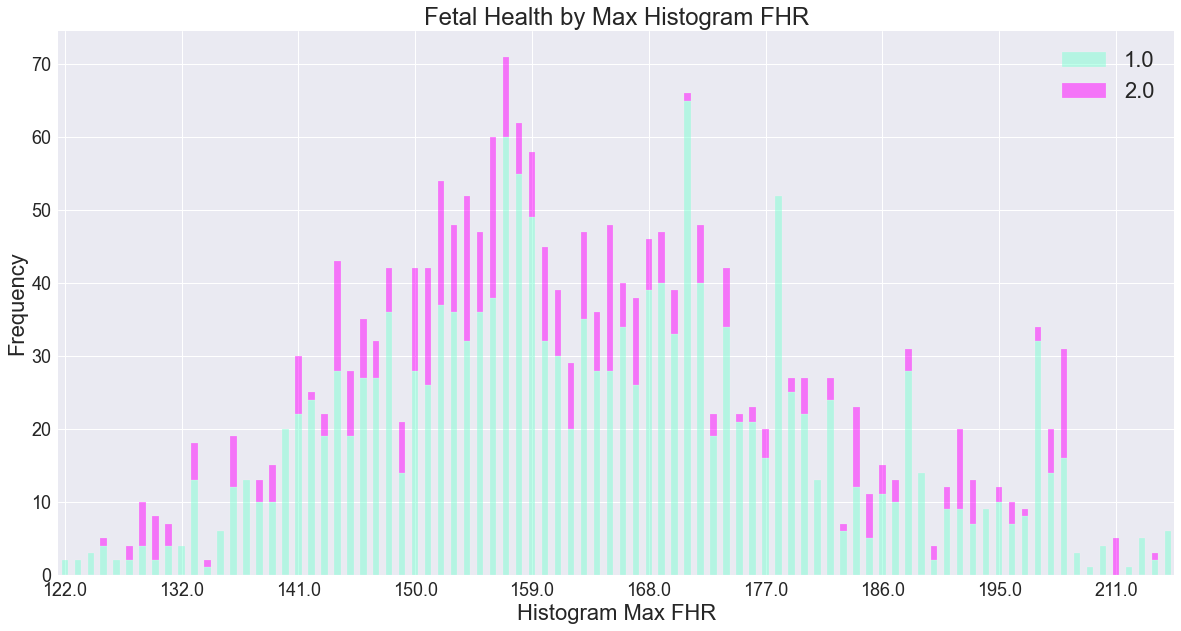

In [41]:
# #Histogram showing the histogram distribution values of maximum FHR by the Classes
histogram_min = df.groupby(['histogram_max','fetal_health']).histogram_max.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('Histogram Max FHR', fontsize=22)
pl.locator_params(axis='x',nbins=10)
pl.set_ylabel('Frequency',fontsize=22)
pl.set_title('Fetal Health by Max Histogram FHR',fontsize=24)
plt.xticks(fontsize=18, rotation=360)
plt.yticks(fontsize=18)
plt.legend(fontsize=22)
plt.savefig('images/Fetal_Health_by_Max_Histogram_FHR.png', bbox_inches='tight')
plt.show()

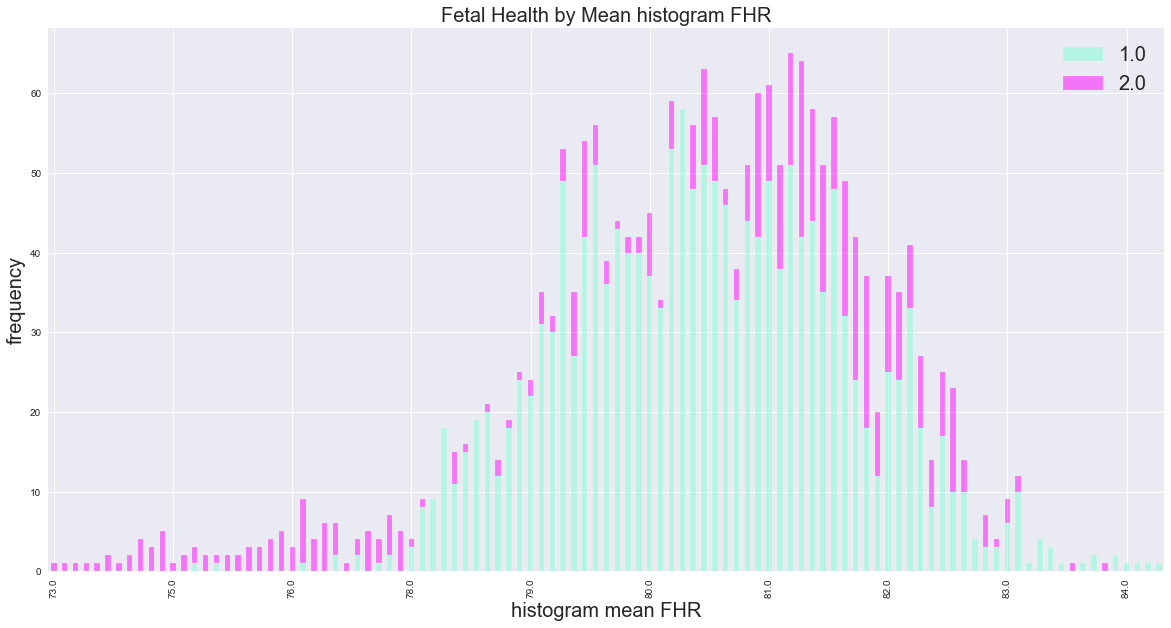

In [22]:
# #Histogram showing the histogram distribution values of average FHR by the Classes
histogram_min = df.groupby(['histogram_mean','fetal_health']).histogram_mean.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram mean FHR',fontsize=20)
pl.locator_params(axis='x',nbins=10)
pl.legend(fontsize=20)
pl.set_ylabel('frequency',fontsize=20)
pl.set_title('Fetal Health by Mean histogram FHR',fontsize=20)
plt.show()

- In the visualizations above you can see the distribution of the two classes for the feature values.  In the histogram mean, you can see a clear section of the distribution only covered by our distressed class.  This became a target for one of our engineered features. 

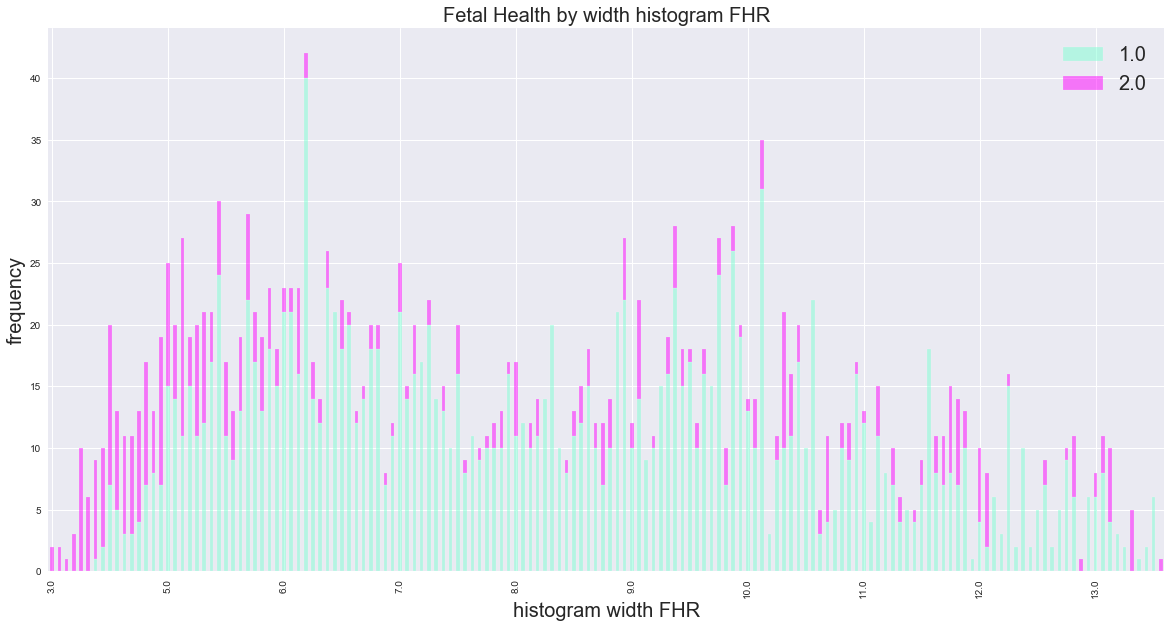

In [23]:
# #Histogram showing the histogram mean values of average FHR by the Classes
histogram_min = df.groupby(['histogram_width','fetal_health']).histogram_width.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram width FHR',fontsize=20)
pl.locator_params(axis='x',nbins=10)
pl.legend(fontsize=20)
pl.set_ylabel('frequency',fontsize=20)
pl.set_title('Fetal Health by width histogram FHR',fontsize=20)
plt.show()

- Next we wanted to take a look at severe decelerations.  We knew that any major changes of FHR when visually monitered results in immediate surgical intervention.  The severe deceleration feature was almost synonymous with the distressed class, however of the 2126 instances in the dataset, there are only 7 instances of severe deceleration.  We suspect this is a key feature in classification, but there may not be enough data here to train the model.  Were to to preform another analysis creating multiple classes of fetal distress, we hypothesis these extreme changes in fetal heart rate will play a role in classifying pathological fetel health.

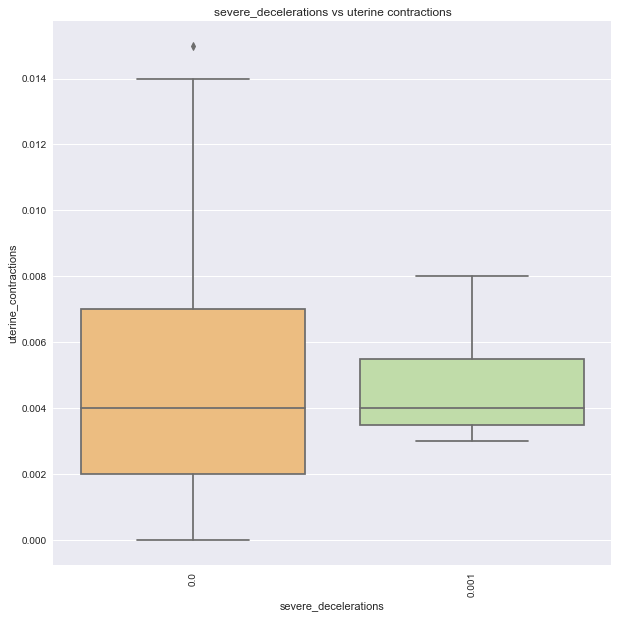

In [24]:
# Boxplot of uterine contractions over per sever deceleration of FHR
plt.figure(figsize = (10,10))
sns.boxplot(x = 'severe_decelerations', 
            y ='uterine_contractions',
            data = df, 
            palette = 'Spectral').set_title('severe_decelerations vs uterine contractions')
plt.xticks(rotation='vertical')
plt.show()

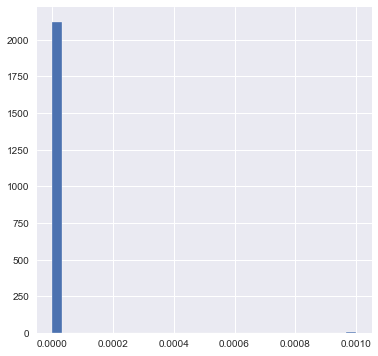

In [25]:
#Histogram showing the distribution of severe deceleration in the dataset
df.severe_decelerations.hist(bins=30,figsize=(6,6))

In [26]:
#value count of the severe decelerations
df.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

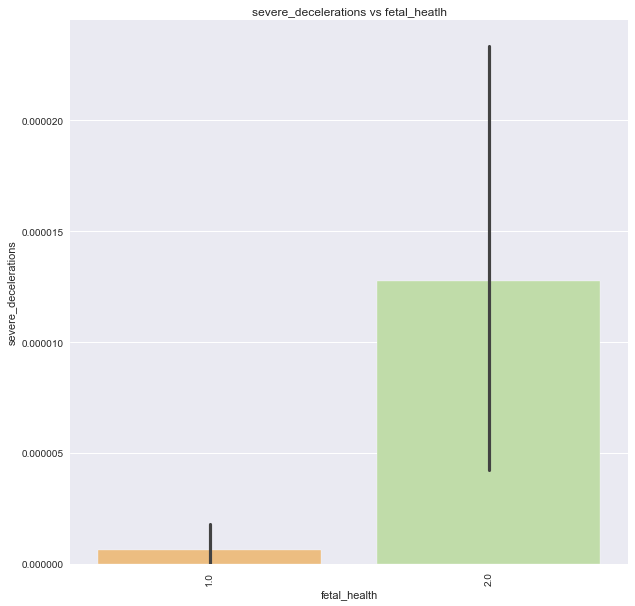

In [27]:
#boxplot of fetal health vs sever deceleration
plt.figure(figsize = (10,10))
sns.barplot(x = 'fetal_health', 
            y ='severe_decelerations',
            data = df, 
            palette = 'Spectral').set_title('severe_decelerations vs fetal_heatlh')
plt.xticks(rotation='vertical')
plt.show()

### Baseline models

- In this step of our EDA we preformed four baseline models to guage how the existing data features preformed on their own.  A KNN classifier yeilded an accuracy of .92, a recall of .96 and a f1 score of .95.  A logistic regression classifier yeilded an accuracy of .89, a recall of .95 and a f1 score of .93.  A decision tree yeilded an accuracy of .92, a recall of .94 and a f1 score of .95.  A random forest classifier yeilded an accuracy of .9, a recall of .99 and an f1 score of .94.  Each of these baseline models preformed very well at predicting the target classes despite the apperent class imbalance.  Our further modeling will focus on identifying which features play a key roll in fetal health classification, and how we can fine tune the models to improve upon the models already good metric scores.

In [28]:
#Train test split to create basline models for the unaltered dataset.
X = df.drop('fetal_health',axis=1)
y= df.fetal_health

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
#an evaluation metric function to reduce clean up the code
def evaluation(y_test, y_pred):
    print('Accuracy: '  + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))

In [30]:
#Baseline knn classifer model using 1 nearest neighbor hyperparameter
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
# predicting on the test set and printing evaluation metrics of the baseline knn model
y_pred = knn.predict(X_test)
evaluation(y_test,y_pred)

Accuracy: 0.9210526315789473
Recall: 0.9682151589242054
F1 Score: 0.9496402877697842
Precision: 0.9317647058823529


In [32]:
# predicting on the test set and printing evaluation metrics of the baseline k model
lr = LogisticRegression()
lr.fit(X_train,y_train)

/Users/heymanjake/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [33]:
# predicting accuracy,recall,f1 and precision with the baseline knn
y_pred = lr.predict(X_test)
evaluation(y_test, y_pred)

Accuracy: 0.8834586466165414
Recall: 0.9535452322738386
F1 Score: 0.9263657957244655
Precision: 0.9006928406466512


In [34]:
#print the feature coefitiants 
print(lr.coef_)

[[ 5.97144683e-02 -3.13272286e-03  2.09943214e-02 -4.25859942e-03
  -1.80517182e-03 -3.22706167e-06  6.53105362e-04  6.05345322e-02
  -5.50578523e-01  5.90624304e-02  7.50134593e-02 -8.70220671e-03
   1.42938314e-02  5.59162469e-03  1.50227080e-01  1.46834852e-01
  -3.40959306e-03 -2.25228806e-02 -9.06518364e-02  2.66209433e-02
   2.04882930e-01]]


In [35]:
#create a table of coefficients matched with their coresponding feature
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
coef_table

0     Coefs
0                                      baseline value  0.059714
1                                       accelerations -0.003133
2                                      fetal_movement  0.020994
3                                uterine_contractions -0.004259
4                                 light_decelerations -0.001805
5                                severe_decelerations -0.000003
6                            prolongued_decelerations  0.000653
7                     abnormal_short_term_variability  0.060535
8                mean_value_of_short_term_variability -0.550579
9   percentage_of_time_with_abnormal_long_term_var...  0.059062
10                mean_value_of_long_term_variability  0.075013
11                                    histogram_width -0.008702
12                                      histogram_min  0.014294
13                                      histogram_max  0.005592
14                          histogram_number_of_peaks  0.150227
15                         histogram_number_of_zeroes  0.146835
16                                     histogram_mode -0.003410
17                                     histogram_mean -0.022523
18                                   histogram_median -0.090652
19                                 histogram_variance  0.026621
20                                 histogram_tendency  0.204883

In [36]:
#Baseline decision tree with evaluation metrics for predictions on the test set
tree = DecisionTreeClassifier()

tree = tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)

evaluation(y_test, y_pred)

Accuracy: 0.9229323308270677
Recall: 0.9437652811735942
F1 Score: 0.949569495694957
Precision: 0.9554455445544554


In [37]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",tree.feature_importances_.transpose())
coef_table

0     Coefs
0                                      baseline value  0.024655
1                                       accelerations  0.034347
2                                      fetal_movement  0.013560
3                                uterine_contractions  0.030435
4                                 light_decelerations  0.002455
5                                severe_decelerations  0.000000
6                            prolongued_decelerations  0.031040
7                     abnormal_short_term_variability  0.343199
8                mean_value_of_short_term_variability  0.114191
9   percentage_of_time_with_abnormal_long_term_var...  0.041889
10                mean_value_of_long_term_variability  0.025902
11                                    histogram_width  0.026173
12                                      histogram_min  0.040912
13                                      histogram_max  0.028327
14                          histogram_number_of_peaks  0.015755
15                         histogram_number_of_zeroes  0.003045
16                                     histogram_mode  0.007541
17                                     histogram_mean  0.171866
18                                   histogram_median  0.027382
19                                 histogram_variance  0.016405
20                                 histogram_tendency  0.000921

In [38]:
#baseline random forest with evaluation metrics for predictions on the test set
rfc = RandomForestClassifier(random_state =1, n_estimators= 50, max_depth = 3, n_jobs =-1,verbose=1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

evaluation(y_test, y_pred)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


Accuracy: 0.9097744360902256
Recall: 0.9902200488997555
F1 Score: 0.944055944055944
Precision: 0.9020044543429844


In [39]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",rfc.feature_importances_.transpose())
coef_table

0     Coefs
0                                      baseline value  0.015332
1                                       accelerations  0.109405
2                                      fetal_movement  0.006348
3                                uterine_contractions  0.030338
4                                 light_decelerations  0.002197
5                                severe_decelerations  0.000000
6                            prolongued_decelerations  0.059527
7                     abnormal_short_term_variability  0.190538
8                mean_value_of_short_term_variability  0.182492
9   percentage_of_time_with_abnormal_long_term_var...  0.101556
10                mean_value_of_long_term_variability  0.012807
11                                    histogram_width  0.025546
12                                      histogram_min  0.018291
13                                      histogram_max  0.006829
14                          histogram_number_of_peaks  0.004216
15                         histogram_number_of_zeroes  0.000461
16                                     histogram_mode  0.067026
17                                     histogram_mean  0.093438
18                                   histogram_median  0.027582
19                                 histogram_variance  0.043824
20                                 histogram_tendency  0.002247

Fore these baseline models, we also checked the coefficient values for the the features in our logistic regression, decision tree and random forest mode.  

## Feature Engineering

In [40]:
#create new column of contractions per minute
df['uterine_cont_per_min'] = df['uterine_contractions']*60

Here we multiplied the uterine_contractions by 60 to get the contractions per minute.  We wanted a larger feature numeric value to train the model with.

In [41]:
#check value counts of acceleration feature
df.accelerations.value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

In [42]:
df.accelerations.describe(include='catagory')

count    2126.000000
mean        0.003178
std         0.003866
min         0.000000
25%         0.000000
50%         0.002000
75%         0.006000
max         0.019000
Name: accelerations, dtype: float64

In [43]:
# bin accelerations by quantile
df['quantile_acceleration'] = pd.qcut(df['accelerations'],
                                     q=[0,.25,.75,1], labels = False,
                                     duplicates='drop')
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   
1                                 10.4            130.0           68.0   
2                                 13.4            130.0           68.0   
3                                 23.0            117.0           53.0   
4                                 19.9            117.0           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  uterine_cont_per_min  \
0                 1.0           2.0                  0.00   
1                 0.0           1.0                  0.36   
2                 0.0           1.0                  0.48   
3                 1.0           1.0                  0.48   
4                 1.0           1.0                  0.48   

   quantile_acceleration  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1

In [44]:
df.quantile_acceleration.value_counts()

0    1697
1     429
Name: quantile_acceleration, dtype: int64

In [45]:
df.light_decelerations.value_counts()

0.000    1231
0.001     163
0.003     118
0.002     115
0.004     114
0.005     107
0.006      74
0.008      55
0.007      54
0.009      37
0.010      15
0.011      13
0.012      12
0.013       8
0.014       7
0.015       3
Name: light_decelerations, dtype: int64

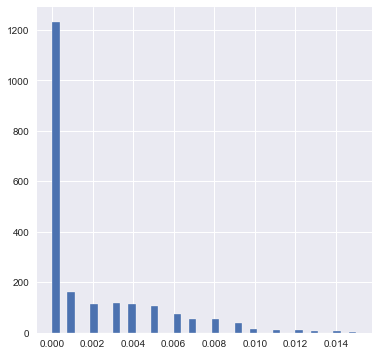

In [46]:
#graph showing distribution of FHR accelerations
df.light_decelerations.hist(bins=40,figsize=(6,6))

In [47]:
#Create new feature
df['total_change'] = ((df.accelerations + df.fetal_movement
                      + df.uterine_contractions + df.light_decelerations
                      + df.severe_decelerations) * df['baseline value'])

In [48]:
# bin light decelerations by quantile 
df['quantile_light_decelerations'] = pd.qcut(df['light_decelerations'],
                                     q=4,labels=False, duplicates='drop'
                                     )

In [49]:
df.quantile_light_decelerations.value_counts()

0    1627
1     499
Name: quantile_light_decelerations, dtype: int64

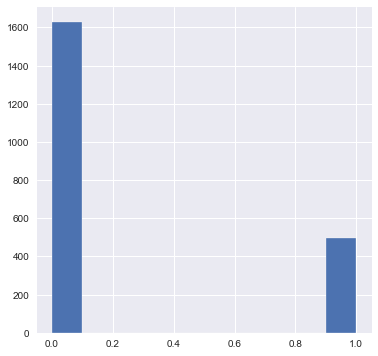

In [68]:
#graph showing the distribution of light deceleration bins
df.quantile_light_decelerations.hist(bins=10, figsize=(6,6))

In [51]:
df.histogram_mean.describe()

count    2126.000000
mean      134.610536
std        15.593596
min        73.000000
25%       125.000000
50%       136.000000
75%       145.000000
max       182.000000
Name: histogram_mean, dtype: float64

In [52]:
pd.qcut(df['histogram_mean'],q=4)

0       (136.0, 145.0]
1       (125.0, 136.0]
2       (125.0, 136.0]
3       (125.0, 136.0]
4       (125.0, 136.0]
             ...      
2121    (145.0, 182.0]
2122    (145.0, 182.0]
2123    (145.0, 182.0]
2124    (145.0, 182.0]
2125    (136.0, 145.0]
Name: histogram_mean, Length: 2126, dtype: category
Categories (4, interval[float64]): [(72.999, 125.0] < (125.0, 136.0] < (136.0, 145.0] < (145.0, 182.0]]

In [53]:
#bin histogram mean and create new bin feature
df['quantile_hist_mean'] = pd.qcut(df['histogram_mean'],q=7,labels=False)

In [54]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   
1                                 10.4            130.0           68.0   
2                                 13.4            130.0           68.0   
3                                 23.0            117.0           53.0   
4                                 19.9            117.0           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  uterine_cont_per_min  \
0                 1.0           2.0                  0.00   
1                 0.0           1.0                  0.36   
2                 0.0           1.0                  0.48   
3                 1.0           1.0                  0.48   
4                 1.0           1.0                  0.48   

   quantile_acceleration  total_change  quantile_light_decelerations  \
0                      0         0.000                             0   
1                      0         1.980                             0   
2                      0         1.862                             0   
3                      0         1.876                             0   
4                      1         1.980                             0   

   quantile_hist_mean  
0                   3  
1                   3  
2                   3  
3                   3  
4                   3

In [55]:
df.quantile_hist_mean.value_counts()

0    333
3    313
1    313
4    301
5    294
6    292
2    280
Name: quantile_hist_mean, dtype: int64

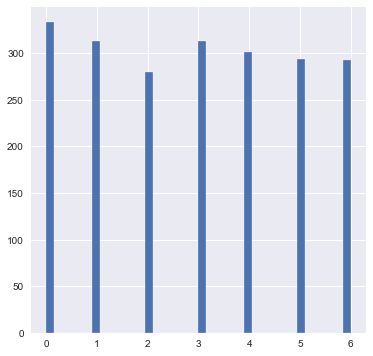

In [56]:
#bin histogram mean
df.quantile_hist_mean.hist(bins=40,figsize=(6,6))

- Here we binned several continuous variable to create discrete variables.  Our plan was to create catagories within the continuous features to observe if these catagories where class specific.  

In [57]:
#New column of all changes to the the baseline squared
df['sqrt_total_change'] = (df.accelerations + df.fetal_movement
                           + df.uterine_contractions + df.light_decelerations
                           + df.severe_decelerations+ df.prolongued_decelerations)**.5

This new feature was the square root of the sum of all the fhr change features.  Many of these features on their own where zero values.  We suspected that the total value of change would help the model with classifying the target.

In [58]:
df.sqrt_total_change.value_counts()

0.083666    118
0.089443    110
0.077460    109
0.109545    104
0.070711    101
           ... 
0.628490      1
0.242899      1
0.681909      1
0.244949      1
0.346410      1
Name: sqrt_total_change, Length: 137, dtype: int64

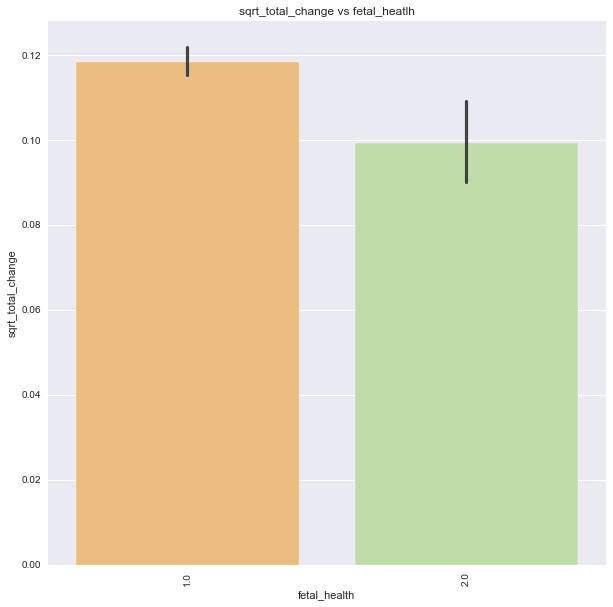

In [59]:
#Barplot of the sqrt_total_change vs fetal health
plt.figure(figsize = (10,10))
sns.barplot(x = 'fetal_health', 
            y ='sqrt_total_change',
            data = df, 
            palette = 'Spectral').set_title('sqrt_total_change vs fetal_heatlh')
plt.xticks(rotation='vertical')
plt.show()

Here we created dummie variables for catagorical features

In [60]:
#Dummy catagories dataframe
zeroes_dummie = pd.get_dummies(df.histogram_number_of_zeroes,prefix='hist_zeros',drop_first=True)
tendancy_dummie = pd.get_dummies(df.histogram_tendency,prefix='hist_tendancy',drop_first=True)
severe_dec_dummie = pd.get_dummies(df.severe_decelerations,prefix='sev_decel',drop_first=True)
quant_acc_dummie = pd.get_dummies(df.quantile_acceleration, prefix='quant_acc',drop_first=True)
quant_light_dec_dummie = pd.get_dummies(df.quantile_light_decelerations,prefix='quant_light_dec',drop_first=True)
quant_hist_mean_dummie = pd.get_dummies(df.quantile_hist_mean,prefix='quant_hist_mean',drop_first=True)

dummie_data = pd.concat([zeroes_dummie,tendancy_dummie,
                         severe_dec_dummie,quant_acc_dummie,
                         quant_light_dec_dummie,quant_hist_mean_dummie],axis=1)
dummie_data.head()

hist_zeros_1.0  hist_zeros_2.0  hist_zeros_3.0  hist_zeros_4.0  \
0               0               0               0               0   
1               1               0               0               0   
2               1               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   hist_zeros_5.0  hist_zeros_7.0  hist_zeros_8.0  hist_zeros_10.0  \
0               0               0               0                0   
1               0               0               0                0   
2               0               0               0                0   
3               0               0               0                0   
4               0               0               0                0   

   hist_tendancy_0.0  hist_tendancy_1.0  sev_decel_0.001  quant_acc_1  \
0                  0                  1                0            0   
1                  1                  0                0            0   
2                  1                  0                0            0   
3                  0                  1                0            0   
4                  0                  1                0            1   

   quant_light_dec_1  quant_hist_mean_1  quant_hist_mean_2  quant_hist_mean_3  \
0                  0                  0                  0                  1   
1                  0                  0                  0                  1   
2                  0                  0                  0                  1   
3                  0                  0                  0                  1   
4                  0                  0                  0                  1   

   quant_hist_mean_4  quant_hist_mean_5  quant_hist_mean_6  
0                  0                  0                  0  
1                  0                  0                  0  
2                  0                  0                  0  
3                  0                  0                  0  
4                  0                  0                  0

In [61]:
#Drop features that where dummied
df_exp = df.drop(['histogram_number_of_zeroes','histogram_tendency',
                  'severe_decelerations','quantile_acceleration',
                  'quantile_light_decelerations','quantile_hist_mean'],axis=1)

In [62]:
#Create new dataframe with new features
Experiment_features = pd.concat([df_exp,dummie_data],axis=1)

In [63]:
Experiment_features.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  prolongued_decelerations  \
0                0.000                       0.0   
1                0.003                       0.0   
2                0.003                       0.0   
3                0.003                       0.0   
4                0.000                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   
1                                 10.4            130.0           68.0   
2                                 13.4            130.0           68.0   
3                                 23.0            117.0           53.0   
4                                 19.9            117.0           53.0   

   histogram_max  histogram_number_of_peaks  histogram_mode  histogram_mean  \
0          126.0                        2.0           120.0           137.0   
1          198.0                        6.0           141.0           136.0   
2          198.0                        5.0           141.0           135.0   
3          170.0                       11.0           137.0           134.0   
4          170.0                        9.0           137.0           136.0   

   histogram_median  histogram_variance  fetal_health  uterine_cont_per_min  \
0             121.0                73.0           2.0                  0.00   
1             140.0                12.0           1.0                  0.36   
2             138.0                13.0           1.0                  0.48   
3             137.0                13.0           1.0                  0.48   
4             138.0                11.0           1.0                  0.48   

   total_change  sqrt_total_change  hist_zeros_1.0  hist_zeros_2.0  \
0         0.000           0.000000               0               0   
1         1.980           0.122474               1               0   
2         1.862           0.118322               1               0   
3         1.876           0.118322               0               0   
4         1.980           0.122474               0               0   

   hist_zeros_3.0  hist_zeros_4.0  hist_zeros_5.0  hist_zeros_7.0  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   hist_zeros_8.0  hist_zeros_10.0  hist_tendancy_0.0  hist_tendancy_1.0  \
0               0                0                  0                  1   
1               0                0    

In [64]:
Experiment_features.shape

(2126, 41)

In [65]:
#Save experimental dataframe as csv
pd.DataFrame(Experiment_features).to_csv('experiment_features.csv')

## Analysis Results
- We found that our baseline models preformed extremely well.  We decided that our analysis should focus on identifying which features where the most important, and if we could improve the models even further.  To improve the models, we decided to split the modeling process by tuning hyperparameters on the unaltered dataframe(vanilla) and the experimental dataframe which contained some new features.  Each new model would provide us with imformation on the features coefficients, giving us the most important features.  For improving the models, we aimed for having the highest possible precission.  We wanted to reduce the rate of false positives(C-section when there is no need for one) while not jeapordizing the accuracy or recall of the model.  


The modeling process can be found in the following notebooks:
- [Vanilla](vanilla_model_cleaned.ipynb)
- [experimental](./experimental_feature_Modeling.ipynb)
